In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
train_df=pd.read_csv('Proj2_Train.csv')
test_df=pd.read_csv('Proj2_Test.csv')

print(train_df.columns.values)
print(test_df.columns.values)

['Sl No' 'Sample ID' 'Age' 'Ob_Score' 'BMI' 'Consistency_Score'
 'Position_Score' 'Effacement_Score' 'Dialation_Score' 'Station_Score'
 'Total_Bishop_Score' 'Cerv_Len_cms' 'Cerv_Wid_cms' 'Induction' 'Del_mode'
 'Unnamed: 15']
['Sl No' 'Sample ID' 'Age' 'Ob_Score' 'BMI' 'Consistency_Score'
 'Position_Score' 'Effacement_Score' 'Dialation_Score' 'Station_Score'
 'Total_Bishop_Score' 'Cerv_Len_cms' 'Cerv_Wid_cms' 'Induction' 'Del_mode']


Since both train and test file contains the same varibale we can merge it using concatinate function and make a Master File 

In [3]:
df = pd.concat([train_df,test_df],axis = 0)

df.head(3)

,Sl No,Sample ID,Age,Ob_Score,BMI,Consistency_Score,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode,Unnamed: 15
0,1,DT1,20,G1,28.255713,2,0,0,1,0,3,NaN,NaN,1,1,NaN
1,2,DT2,21,G1,29.772191,2,0,1,1,0,4,NaN,NaN,1,1,NaN
2,3,DT3,21,G1,28.511248,2,0,1,1,0,4,NaN,NaN,1,1,NaN


In [4]:
df.shape

(1100, 16)

In [5]:
print(df['Ob_Score'].unique())

['G1' 'G2A1' 'G3A2']


In [6]:
print(df['Ob_Score'].value_counts())

G1      1034
G2A1      44
G3A2      22
Name: Ob_Score, dtype: int64


In [7]:
label_encoder=LabelEncoder()
df['Ob_Score'] = label_encoder.fit_transform(df['Ob_Score'])

In [8]:
df.drop (columns = ['Sl No', 'Sample ID' , 'Consistency_Score','Unnamed: 15','Age'],axis = 1, inplace = True  )

In [9]:
df.head(3)

,Ob_Score,BMI,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode
0,0,28.255713,0,0,1,0,3,NaN,NaN,1,1
1,0,29.772191,0,1,1,0,4,NaN,NaN,1,1
2,0,28.511248,0,1,1,0,4,NaN,NaN,1,1


In [10]:
df.isnull().sum()

Ob_Score                0
BMI                     0
Position_Score          0
Effacement_Score        0
Dialation_Score         0
Station_Score           0
Total_Bishop_Score      0
Cerv_Len_cms          660
Cerv_Wid_cms          660
Induction               0
Del_mode                0
dtype: int64

<AxesSubplot:xlabel='Cerv_Len_cms', ylabel='Density'>

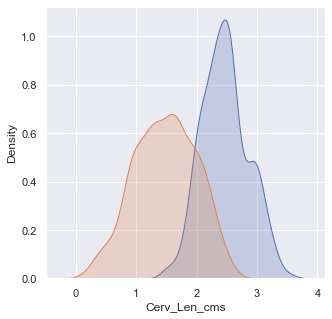

In [11]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(df['Cerv_Len_cms'],shade=True)

sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(df['Cerv_Wid_cms'],shade=True)

# Missing value treatment using KNN_Imputer 

KNN is an algorithm that is useful for matching a point with its closest k neighbors in a multi-dimensional space. It can be used for data that are continuous, discrete, ordinal and categorical which makes it particularly useful for dealing with all kind of missing data.

The assumption behind using KNN for missing values is that a point value can be approximated by the values of the points that are closest to it, based on other variables.

In [12]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

<AxesSubplot:xlabel='Cerv_Len_cms', ylabel='Density'>

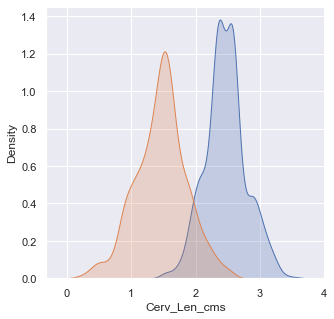

In [13]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(df['Cerv_Len_cms'],shade=True)

sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(df['Cerv_Wid_cms'],shade=True)

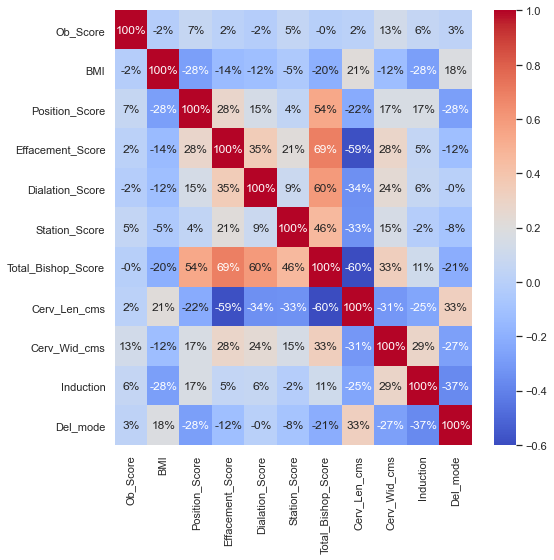

In [14]:
plt.figure(figsize = (8,8))
cor=df.corr()
sns.heatmap(cor, annot = True, cmap ='coolwarm' , fmt = '.0%')
plt.show()

From the above heatmap it shows the correlation between dependent and independent variables is very less . 

In [15]:
x = df.iloc[:,0:10]
y = df.iloc[:,-1]

#print shape of x & y
print(x.shape)
print(y.shape)

(1100, 10)
(1100,)


# Standardize the data using StandardScaler 



In [16]:
scaling = StandardScaler()
scaling= scaling.fit_transform(x)

# Convert into a dataframe 

Scaling down our transformed varibale is very important . 

Otherwise it will throw error in terms of when we split our into train and test set 

when we scale down our x varibale it converts into an array object and therefore we need to define a new dataframe inorder to avoid inconsistencies in train test data 


In [17]:
type(scaling)

numpy.ndarray

In [18]:
x1=pd.DataFrame(scaling, columns = x.columns)
x=x1
print(x.head())

   Ob_Score       BMI  Position_Score  Effacement_Score  Dialation_Score  \
0 -0.237356  0.627855        -1.01835         -0.846680         1.058046   
1 -0.237356  1.227399        -1.01835          1.130704         1.058046   
2 -0.237356  0.728881        -1.01835          1.130704         1.058046   
3 -0.237356  0.832245        -1.01835          1.130704         1.058046   
4 -0.237356  0.324700        -1.01835         -0.846680         1.058046   

   Station_Score  Total_Bishop_Score  Cerv_Len_cms  Cerv_Wid_cms  Induction  
0      -0.551073           -0.583871      0.585917      1.037588   0.252646  
1      -0.551073            0.305683      0.001948      0.180165   0.252646  
2      -0.551073            0.305683      0.078680      0.493166   0.252646  
3      -0.551073            0.305683      0.010541      0.518861   0.252646  
4      -0.551073           -0.583871      1.008565      0.580791   0.252646  


In [19]:
type(x)

pandas.core.frame.DataFrame

In [20]:
type(y)

pandas.core.series.Series

# Train Test & Validation split  

In [21]:
# set aside 20% of train and test data for evaluation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
x_train.shape , y_train.shape, x_test.shape , y_test.shape

((880, 10), (880,), (220, 10), (220,))

In [22]:
# Use the same function above for the validation set
x_train, x_val, y_train ,y_val = train_test_split(x_train, y_train, 
    test_size=0.10, random_state= 0) # 0.25 x 0.8 = 0.2

print("x_train shape: {}".format(x_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("x_val shape: {}".format(y_train.shape))
print("y_val shape: {}".format(y_test.shape))

x_train shape: (792, 10)
x_test shape: (220, 10)
y_train shape: (792,)
y_test shape: (220,)
x_val shape: (792,)
y_val shape: (220,)


# Model Building using Keras from Tensorflow

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, Activation 
from tensorflow.keras import layers, models, callbacks 
from keras.callbacks import EarlyStopping , ModelCheckpoint

In [24]:
#Building neural network 
model = Sequential()
model.add(Dense(10, input_shape =(880, 10),activation ='relu'))
model.add(Dense (8, activation ='relu'))
model.add(Dense (4, kernel_regularizer= regularizers.l2(0.01),
                 activity_regularizer = regularizers.l1(0.01),activation ='relu'))
model.add(Dense (1, activation ='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 880, 10)           110       
_________________________________________________________________
dense_1 (Dense)              (None, 880, 8)            88        
_________________________________________________________________
dense_2 (Dense)              (None, 880, 4)            36        
_________________________________________________________________
dense_3 (Dense)              (None, 880, 1)            5         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________
None


# Compilation & Training the Model

Before training a model, you need to configure the learning process, which is done via the compile method. It receives three arguments:

1) an Optimizer. This could be the string identifier of an existing optimizer .We are using 'adam' optimizer for our binary classifier.

2) a Loss function. This is the objective that the model will try to minimize. If can be the string identifier of an existing loss function .We are using 'binary_crossentropy' for our loss function.

3) a list of Metrics. For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric.

The number of epochs, through which the entire training data is passed, is set at 25. Two callbacks are specified:

1) EarlyStopping to stop the training when val_loss (validation loss) no longer improves after 5 consecutive epochs and

2) ModelCheckpoint to save the model that yields the best value of val_loss, i.e., when said value is the most minimized.

In [25]:
#Define an optimizer 
model.compile (loss ='binary_crossentropy',optimizer ='adam', metrics =['accuracy'])

stop_early = callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=15)

checkpoint = callbacks.ModelCheckpoint('my_keras_model.hdf5',
                                        verbose=2,
                                        save_best_only=True,
                                        monitor='val_loss')
#Train the model 
model.fit(x_train,y_train,
              validation_data= (x_val,y_val),
              epochs= 36,
              callbacks= (stop_early, checkpoint),
              verbose=2)

Epoch 1/36
25/25 - 1s - loss: 0.8864 - accuracy: 0.3864 - val_loss: 0.8575 - val_accuracy: 0.3523

Epoch 00001: val_loss improved from inf to 0.85753, saving model to my_keras_model.hdf5
Epoch 2/36
25/25 - 0s - loss: 0.7996 - accuracy: 0.4242 - val_loss: 0.7797 - val_accuracy: 0.3977

Epoch 00002: val_loss improved from 0.85753 to 0.77970, saving model to my_keras_model.hdf5
Epoch 3/36
25/25 - 0s - loss: 0.7433 - accuracy: 0.5694 - val_loss: 0.7106 - val_accuracy: 0.7045

Epoch 00003: val_loss improved from 0.77970 to 0.71056, saving model to my_keras_model.hdf5
Epoch 4/36
25/25 - 0s - loss: 0.6988 - accuracy: 0.6869 - val_loss: 0.6637 - val_accuracy: 0.7500

Epoch 00004: val_loss improved from 0.71056 to 0.66371, saving model to my_keras_model.hdf5
Epoch 5/36
25/25 - 0s - loss: 0.6729 - accuracy: 0.6982 - val_loss: 0.6329 - val_accuracy: 0.7500

Epoch 00005: val_loss improved from 0.66371 to 0.63286, saving model to my_keras_model.hdf5
Epoch 6/36
25/25 - 0s - loss: 0.6542 - accuracy: 

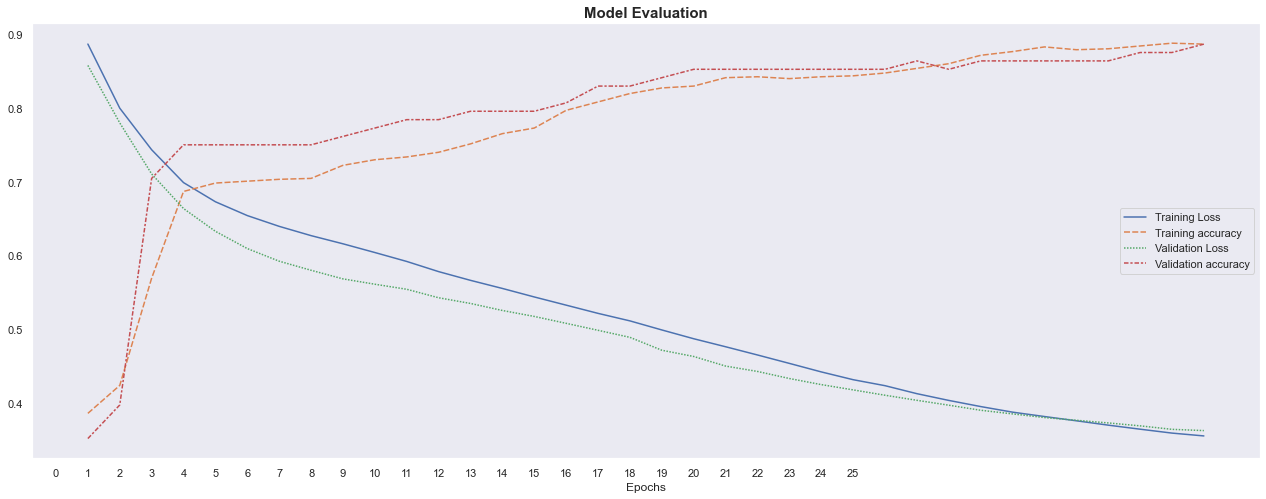

In [26]:
#Check the Best fit model & loss function
train_result = pd.DataFrame(model.history.history, 
                           index = range(1, 1+len(model.history.epoch)))
plt.subplots(figsize = (22, 8))
sns.lineplot(data= train_result)
plt.xlabel("Epochs")
plt.legend(labels=['Training Loss', 'Training accuracy', 'Validation Loss', 'Validation accuracy'])
plt.title('Model Evaluation', size = 15, weight = 'bold')
plt.xticks(range(0, 26, 1))
plt.grid()
plt.show()

The above chart, training loss is shown in blue, validation loss in green, both as a function of the number of training epochs. 
The chart clearly shows about overfitting problem between training loss and validation loss. The validation error increases while the training error steadily decreases, this is a situation of overfitting that have occurredin the model.

# Making prediction on new data

In [27]:
y_pred = model.predict(x_test)
y_pred_evaluation = model.predict(x_val)

# Checking the accuracy and loss on test dataset

In [28]:
val_loss = model.evaluate(x_test)
val_loss

7/7 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.0000e+00


[0.05336534231901169, 0.0]

# Save the model

In [29]:
model.save('my_keras_model.h5')